In [236]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
RANDOM_SEED = 0

In [237]:
df = pd.read_csv(PATH)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [238]:
df.isna().sum()     # no missing values 

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [239]:
X = df.drop('price', axis=1).values

In [240]:
y = df['price'].values  # target
y[:5]

array([13300000, 12250000, 12250000, 12215000, 11410000])

In [241]:
def evaluate(model, dataset):

  X, y = dataset
  y_pred = model.predict(X)
  print(f'RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.2f}')
  print(f'R2: {r2_score(y, y_pred):.2f}')

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)


ss = StandardScaler()
X_train = ss.fit_transform(X_train)  
X_test= ss.transform(X_test)

In [243]:
def evaluate_mse(model, dataset):

    X, y = dataset

    y_pred = model.predict(X)

    return mean_squared_error(y, y_pred)

def calculate_residuals(model, dataset):

    X, y = dataset

    y_pred = model.predict(X)
    
    return y - y_pred

#### LINEAR MODEL

In [244]:
lr = LinearRegression()
lr.fit(X_train, y_train)

evaluate(lr, (X_train, y_train))
evaluate(lr, (X_test, y_test))

RMSE: 1097693.37
R2: 0.66
RMSE: 980758.42
R2: 0.72


#### RIDGE MODEL

In [245]:
ridgeModel = Ridge(alpha=500)
ridgeModel.fit(X_train, y_train)

evaluate(ridgeModel, (X_train, y_train))
evaluate(ridgeModel, (X_test, y_test))

RMSE: 1237907.34
R2: 0.56
RMSE: 1125020.29
R2: 0.64


#### LASSO MODEL

In [246]:
lassoModel = Lasso(alpha=20000)
lassoModel.fit(X_train, y_train)

evaluate(lassoModel, (X_train, y_train))
evaluate(lassoModel, (X_test, y_test))

RMSE: 1098784.13
R2: 0.66
RMSE: 973437.75
R2: 0.73


#### ELASTIC NET MODEL


In [247]:
elasticNetModel = ElasticNet(alpha=20000, l1_ratio=1)
elasticNetModel.fit(X_train, y_train)

evaluate(elasticNetModel, (X_train, y_train))
evaluate(elasticNetModel, (X_test, y_test))

RMSE: 1098784.13
R2: 0.66
RMSE: 973437.75
R2: 0.73


#### CROSS VALIDATION

In [248]:
from sklearn.model_selection import KFold

# CREAZIONE KFOLD
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
kf.get_n_splits(X)

train_score = []
test_score = []

for train_index, test_index in kf.split(X):
	
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    r2_train = r2_score(y_train, lr.predict(X_train))
    r2_test = r2_score(y_test, lr.predict(X_test))

    train_score.append(r2_train)
    test_score.append(r2_test)

# CREAZIONE DIZIONARIO
scores = {"train_score":np.array(train_score), "test_score":np.array(test_score)} 

# LETTURA RISULTATI
scores["test_score"].mean()

np.float64(0.6536369870517889)

#### MSE COMPARISON

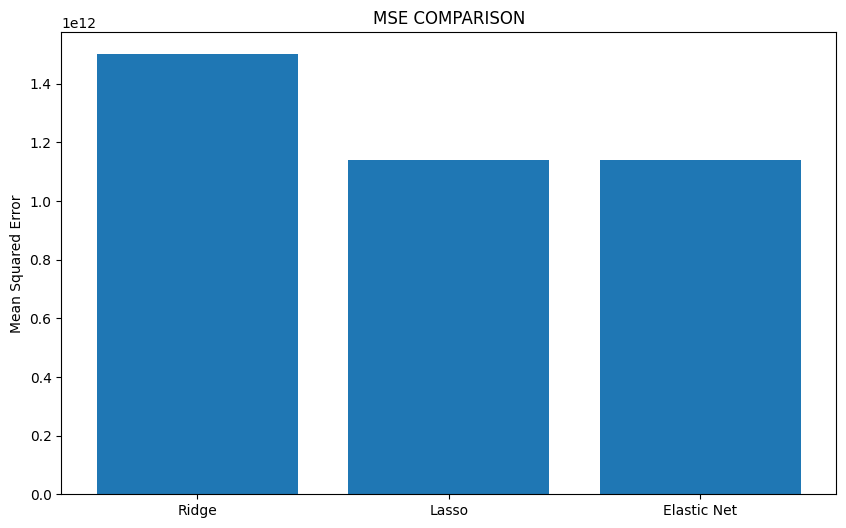

In [249]:
plt.figure(figsize=(10, 6))
models = ['Ridge', 'Lasso', 'Elastic Net']
mse_values = [evaluate_mse(ridgeModel, (X_train, y_train)), evaluate_mse(lassoModel, (X_train, y_train)), evaluate_mse(elasticNetModel, (X_train, y_train))]
plt.bar(models, mse_values)
plt.title('MSE COMPARISON')
plt.ylabel('Mean Squared Error')
plt.show()

#### RESIDUALS DISTRIBUTION

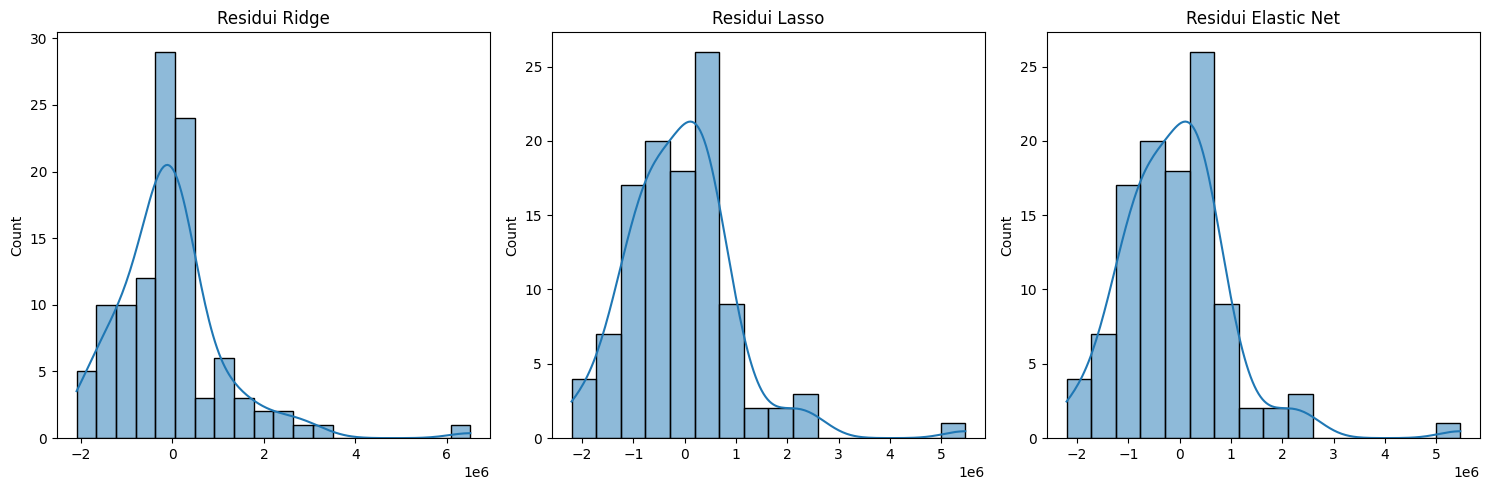

In [250]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(calculate_residuals(ridgeModel, (X_test, y_test)), kde=True, ax=ax1)
ax1.set_title('Residui Ridge')
sns.histplot(calculate_residuals(lassoModel, (X_test, y_test)), kde=True, ax=ax2)
ax2.set_title('Residui Lasso')
sns.histplot(calculate_residuals(elasticNetModel, (X_test, y_test)), kde=True, ax=ax3)
ax3.set_title('Residui Elastic Net')
plt.tight_layout()
plt.show()

#### COEFFICIENTS TREND

In [ ]:
alphas_ridge = np.logspace(-6, 6, 100)
alphas_lasso = np.logspace(-6, 6, 100)
alphas_elastic_net = np.logspace(-6, 6, 100)
l1_ratios = np.linspace(0, 1, 100)

# Ridge Regression
ridge_cv = RidgeCV(alphas=alphas_ridge, cv=5)
ridge_cv.fit(X_train, y_train)
best_alpha_ridge = ridge_cv.alpha_
ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train, y_train)
ridge_coefficients = ridge_model.coef_

# Lasso Regression
lasso_cv = LassoCV(alphas=alphas_lasso, cv=5)
lasso_cv.fit(X_train, y_train)
best_alpha_lasso = lasso_cv.alpha_
lasso_model = Lasso(alpha=best_alpha_lasso)
lasso_model.fit(X_train, y_train)
lasso_coefficients = lasso_model.coef_

# Elastic Net Regression
elastic_net_cv = ElasticNetCV(alphas=alphas_elastic_net, l1_ratio=l1_ratios, cv=5)
elastic_net_cv.fit(X_train, y_train)
best_alpha_elastic_net = elastic_net_cv.alpha_
best_l1_ratio = elastic_net_cv.l1_ratio_
elastic_net_model = ElasticNet(alpha=best_alpha_elastic_net, l1_ratio=best_l1_ratio)
elastic_net_model.fit(X_train, y_train)
elastic_net_coefficients = elastic_net_model.coef_

plt.figure(figsize=(16, 6))

# Ridge
plt.subplot(1, 3, 1)
for i, coef in enumerate(ridge_coefficients):
    plt.plot(np.log(alphas_ridge), [coef] * len(alphas_ridge), label=f'{df.columns[i+1]}')
plt.xlabel('log(alpha)')
plt.ylabel('Coefficienti')
plt.title('Ridge Regression')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Lasso
plt.subplot(1, 3, 2)
for i, coef in enumerate(lasso_coefficients):
    plt.plot(np.log(alphas_lasso), [coef] * len(alphas_lasso), label=f'{df.columns[i+1]}')
plt.xlabel('log(alpha)')
plt.ylabel('Coefficienti')
plt.title('Lasso Regression')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Elastic Net   
plt.subplot(1, 3, 3)
for i, coef in enumerate(elastic_net_coefficients):
    plt.plot(np.log(alphas_elastic_net), [coef] * len(alphas_elastic_net), label=f'{df.columns[i+1]}')
plt.xlabel('log(alpha)')
plt.ylabel('Coefficienti')
plt.title('Elastic Net Regression')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()